# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

Creamos cada una de las librerias que vamos a usar durante todo el proyecto, junto con sus siglas respectivas.

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar datos

Llamamos cada uno de los DataFrames a desarrollar y analizar.

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

Seguido a esto vamos a llamar el metodo .info(), .head() y .describe(), para poder visualizar un poco que contiene cada DataFrame (de que esta compuesto) y llevarnos una idea inicial sobre que tenemos que comenzar a limpiar y organizar, lo anterior para cada uno de los 5 DataFrame.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()
print(plans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15

In [4]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Conclusión: La informacion general se observa correctamente, los Dtype estan correctos, y no existen valores ausentes, para las condiciones de este proyecto, tan solo vamos a crear una columna que especifique la informacion en GB.

## Corregir datos

En este caso el DataFrame correspondiente a las tarifas, no tiene ninguna inconsistencia a corregir.

## Enriquecer los datos

Se enriqueceran los datos, insertando una columna que aclare y de mejor visibilidad a lo que equivale en GB.

In [5]:
plans["gb_per_month_included"] = np.ceil(plans["mb_per_month_included"] / 1024).astype(int)
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()
print(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [7]:
# Imprime una muestra de datos para usuarios

print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Conclusión: La informacion en general se observa que esta correcta, sin embargo el Dtype para la columna de fechas esta como object, y la columna churn date tiene 466 datos ausentes.

### Corregir los datos

Se eliminara la columna churn date porque tiene un gran porcentaje como nulo, y para nuestro analisis no la consideramos importante.

In [8]:
users.drop(columns=['churn_date'],inplace=True)

Se corregira el Dtype de la columna reg_date.

In [9]:
users["reg_date"] = pd.to_datetime(users["reg_date"])

### Enriquecer los datos

Tal vez para posteriores analisis, podriamos agregar una columna de antiguedad.

In [10]:
users["perm_years"] = (
    (pd.Timestamp("today") - users["reg_date"]).dt.days / 365
).astype(int)

In [11]:
# Se observa el cambio de tipo, ya no aparece la columna churn_date, y se observa la inclusion de la nueva columna de antiguedad del usuario.

users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
perm_years             int64
dtype: object

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()
print(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [13]:
# Imprime una muestra de datos para las llamadas

print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Conclusión: La informacion se observa correctamente, no existen valores ausentes; haria falta ajustar la fecha a un tipo de formato acorde para fechas, y la duracion como tipo entero, de igual forma aproximarlo hacia arriba como se especifica en las instrucciones.

### Corregir los datos

Se corregira el Dtype de la columna call_date, al igual que se creara una nueva columna para especificar y redondear la duracion a minutos como tipo entero al siguiente minuto, de acuerdo a las instrucciones iniciales del proyecto.

In [14]:
calls["call_date"] = pd.to_datetime(calls["call_date"])
calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [15]:
calls["min_duration"] = np.ceil(calls["duration"]).astype(int)
print(calls.head())

         id  user_id  call_date  duration  min_duration
0   1000_93     1000 2018-12-27      8.52             9
1  1000_145     1000 2018-12-27     13.66            14
2  1000_247     1000 2018-12-27     14.48            15
3  1000_309     1000 2018-12-28      5.76             6
4  1000_380     1000 2018-12-30      4.22             5


### Enriquecer los datos

Se añadira una columna que contenga el año y el mes, ya que todo el analisis se realizara de forma mensual.

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'],errors='coerce')
calls['year_month'] = calls['call_date'].dt.strftime("%Y-%m")
calls.head()

,id,user_id,call_date,duration,min_duration,year_month
0,1000_93,1000,2018-12-27,8.52,9,2018-12
1,1000_145,1000,2018-12-27,13.66,14,2018-12
2,1000_247,1000,2018-12-27,14.48,15,2018-12
3,1000_309,1000,2018-12-28,5.76,6,2018-12
4,1000_380,1000,2018-12-30,4.22,5,2018-12


In [17]:
# Se observa el cambio de tipo y se observa la inclusion de las nuevas columnas.

calls.dtypes

id                      object
user_id                  int64
call_date       datetime64[ns]
duration               float64
min_duration             int64
year_month              object
dtype: object

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()
print(messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [19]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Conclusión: La informacion se observa correctamente, no existen valores ausentes; haria falta ajustar la fecha a un tipo de formato acorde para fechas.

### Corregir los datos

Se corregira el Dtype de la columna message_date.

In [20]:
messages["message_date"] = pd.to_datetime(messages["message_date"])
messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### Enriquecer los datos

Se añadira una columna que contenga el año y el mes, ya que todo el analisis se realizara de forma mensual.

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'],errors='coerce')
messages['year_month'] = messages['message_date'].dt.strftime("%Y-%m")
messages.head()

,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [22]:
# Se observa el cambio de tipo y se observa la inclusion de la nueva columna.

messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
year_month              object
dtype: object

## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()
print(internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [24]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Conclusión: La informacion se observa correctamente, no existen valores ausentes; haria falta ajustar la fecha a un tipo de formato acorde para fechas, y se debe ajustar a GB de acuerdo a las instrucciones iniciales.

### Corregir los datos

Se corregira el Dtype de la columna session_date.

In [25]:
internet["session_date"] = pd.to_datetime(internet["session_date"])
internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [26]:
internet["gb_used"] = np.ceil(internet["mb_used"] / 1024).astype(int)
print(internet.head())

         id  user_id session_date  mb_used  gb_used
0   1000_13     1000   2018-12-29    89.86        1
1  1000_204     1000   2018-12-31     0.00        0
2  1000_379     1000   2018-12-28   660.40        1
3  1000_413     1000   2018-12-26   270.99        1
4  1000_442     1000   2018-12-27   880.22        1


### Enriquecer los datos

Se añadira una columna que contenga el año y el mes, ya que todo el analisis se realizara de forma mensual.

In [27]:
internet['session_date'] = pd.to_datetime(internet['session_date'],errors='coerce')
internet['year_month'] = internet['session_date'].dt.strftime("%Y-%m")
internet.head()

,id,user_id,session_date,mb_used,gb_used,year_month
0,1000_13,1000,2018-12-29,89.86,1,2018-12
1,1000_204,1000,2018-12-31,0.00,0,2018-12
2,1000_379,1000,2018-12-28,660.40,1,2018-12
3,1000_413,1000,2018-12-26,270.99,1,2018-12
4,1000_442,1000,2018-12-27,880.22,1,2018-12


In [28]:
# Se observa el cambio de tipo y se observa la inclusion de las nuevas columnas.

internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
gb_used                  int64
year_month              object
dtype: object

## Estudiar las condiciones de las tarifas

Observemos como esta compuesta el DF de plans para tener mas claro como es que funciona la aplicacion de las tarifas.

In [29]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Agregar datos por usuario

> Se agregara los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo, ya que esto facilitará el análisis posterior.

In [30]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_by_user_and_month=calls.groupby(['user_id','year_month'])['id'].count().reset_index(name='num_calls')
calls_by_user_and_month

,user_id,year_month,num_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [31]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

mins_by_user_and_month=calls.groupby(['user_id','year_month'])['min_duration'].sum().reset_index(name='num_mins')
mins_by_user_and_month

,user_id,year_month,num_mins
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


In [32]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_by_user_and_month=messages.groupby(['user_id','year_month'])['id'].count().reset_index(name='num_messages')
messages_by_user_and_month

,user_id,year_month,num_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [33]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_by_user_and_month=internet.groupby(['user_id','year_month'])['gb_used'].sum().reset_index(name='num_gb')
internet_by_user_and_month

,user_id,year_month,num_gb
0,1000,2018-12,4
1,1001,2018-08,21
2,1001,2018-09,41
3,1001,2018-10,50
4,1001,2018-11,49
...,...,...,...
2272,1498,2018-12,56
2273,1499,2018-09,37
2274,1499,2018-10,52
2275,1499,2018-11,43


> Se juntaran los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado, y se le adicionara el plan que tiene asignado para que sea mas claro a la vista.

In [34]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

complete_by_user = calls_by_user_and_month \
    .merge(mins_by_user_and_month, on=["user_id", "year_month"], how="left") \
    .merge(messages_by_user_and_month, on=["user_id", "year_month"], how="left") \
    .merge(internet_by_user_and_month, on=["user_id", "year_month"], how="left")

complete_by_user.head()

,user_id,year_month,num_calls,num_mins,num_messages,num_gb
0,1000,2018-12,16,124,11.0,4.0
1,1001,2018-08,27,182,30.0,21.0
2,1001,2018-09,49,315,44.0,41.0
3,1001,2018-10,65,393,53.0,50.0
4,1001,2018-11,64,426,36.0,49.0


In [35]:
# Añade la información de la tarifa

complete_by_user = complete_by_user.merge(users[['user_id','plan']])
complete_by_user.head()

,user_id,year_month,num_calls,num_mins,num_messages,num_gb,plan
0,1000,2018-12,16,124,11.0,4.0,ultimate
1,1001,2018-08,27,182,30.0,21.0,surf
2,1001,2018-09,49,315,44.0,41.0,surf
3,1001,2018-10,65,393,53.0,50.0,surf
4,1001,2018-11,64,426,36.0,49.0,surf


> Luego de haber unido las diferentes tablas de la informacion agrupada por cada usuario, se ajustan los valores nulos que se pudieron presentar, al igual que el tipo de formato, para que quede un poco mas limpia nuestro DF final con el que vamos a realizar los proximos analisis.

In [36]:
cols = ["num_messages", "num_gb"]
complete_by_user[cols] = (complete_by_user[cols].fillna(0).astype(int))
complete_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       2258 non-null   int64 
 1   year_month    2258 non-null   object
 2   num_calls     2258 non-null   int64 
 3   num_mins      2258 non-null   int64 
 4   num_messages  2258 non-null   int64 
 5   num_gb        2258 non-null   int64 
 6   plan          2258 non-null   object
dtypes: int64(5), object(2)
memory usage: 141.1+ KB


Calcularemos los ingresos mensuales por cada usuario de acuerdo al plan que cada uno tenga, teniendo su cargo inicial, y luego adicionandole los valores extra que hubiera tenido en el mes.

In [37]:
# Vamos a unir los datos de la tabla de plans, a nuestra tabla completa de usuarios para posteriormente comenzar a hacer los calculos.

t_complete_by_user=complete_by_user.merge(plans, left_on="plan", right_on="plan_name", how="left")
t_complete_by_user.drop(columns=["plan_name"], inplace=True)
print(t_complete_by_user.head())

   user_id year_month  num_calls  num_mins  num_messages  num_gb      plan  \
0     1000    2018-12         16       124            11       4  ultimate   
1     1001    2018-08         27       182            30      21      surf   
2     1001    2018-09         49       315            44      41      surf   
3     1001    2018-10         65       393            53      50      surf   
4     1001    2018-11         64       426            36      49      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70           7             0.01            0.01   
1     

In [38]:
# Vamos a calcular los valores de exceso al plan original

t_complete_by_user["extra_minutes"] = (t_complete_by_user["num_mins"] - t_complete_by_user["minutes_included"]).clip(lower=0)

t_complete_by_user["extra_messages"] = (t_complete_by_user["num_messages"] - t_complete_by_user["messages_included"]).clip(lower=0)

t_complete_by_user["extra_gb"] = (t_complete_by_user["num_gb"] - t_complete_by_user["gb_per_month_included"]).clip(lower=0)

print(t_complete_by_user.head())

   user_id year_month  num_calls  num_mins  num_messages  num_gb      plan  \
0     1000    2018-12         16       124            11       4  ultimate   
1     1001    2018-08         27       182            30      21      surf   
2     1001    2018-09         49       315            44      41      surf   
3     1001    2018-10         65       393            53      50      surf   
4     1001    2018-11         64       426            36      49      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70           7             0.01            0.01   
1     

In [39]:
# Luego de saber los valores extras, vamos a calcular el costo extra de los 3 anteriores items de acuerdo a las tarifas que hay para cada uno.

t_complete_by_user["extra_pay"] = (t_complete_by_user["extra_minutes"] * t_complete_by_user["usd_per_minute"] + t_complete_by_user["extra_messages"] * t_complete_by_user["usd_per_message"] + t_complete_by_user["extra_gb"] * t_complete_by_user["usd_per_gb"])
print(t_complete_by_user.head())

   user_id year_month  num_calls  num_mins  num_messages  num_gb      plan  \
0     1000    2018-12         16       124            11       4  ultimate   
1     1001    2018-08         27       182            30      21      surf   
2     1001    2018-09         49       315            44      41      surf   
3     1001    2018-10         65       393            53      50      surf   
4     1001    2018-11         64       426            36      49      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70           7             0.01            0.01   
1     

In [40]:
# Ahora si obtenemos el valor del ingreso mensual para cada usuario, sumandole al valor original del plan, los extras.

t_complete_by_user["revenue"] = (t_complete_by_user["usd_monthly_pay"] + t_complete_by_user["extra_pay"])
print(t_complete_by_user.head())

   user_id year_month  num_calls  num_mins  num_messages  num_gb      plan  \
0     1000    2018-12         16       124            11       4  ultimate   
1     1001    2018-08         27       182            30      21      surf   
2     1001    2018-09         49       315            44      41      surf   
3     1001    2018-10         65       393            53      50      surf   
4     1001    2018-11         64       426            36      49      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70           7             0.01            0.01   
1     

## Estudia el comportamiento de usuario

#### Vamos a calcular algunas estadísticas descriptivas para los datos fusionados, donde se mostrara un panorama general captado por los datos.

### Llamadas

In [41]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. 

t_complete_by_user['avg_call_time'] = (t_complete_by_user['num_mins'] / t_complete_by_user['num_calls'])
avg_time_by_plan_month = (t_complete_by_user.groupby(['year_month', 'plan'])['avg_call_time'].mean().reset_index())

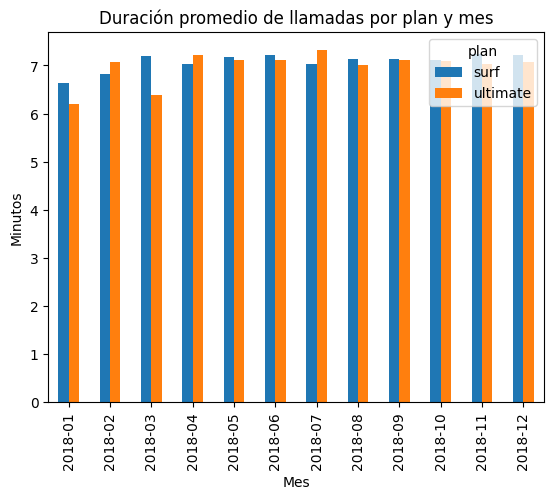

In [42]:
# Ahora trazamos un gráfico de barras para visualizar.

data_call = avg_time_by_plan_month.pivot(index='year_month', columns='plan', values='avg_call_time')

data_call.plot(kind='bar')

plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.show()

Conclusión: Se observa que la gran mayoria de meses las personas que tienen el plan Surf, tienden a durar mas tiempo en cada una de sus llamadas.

Text(0, 0.5, 'Cantidad usuarios')

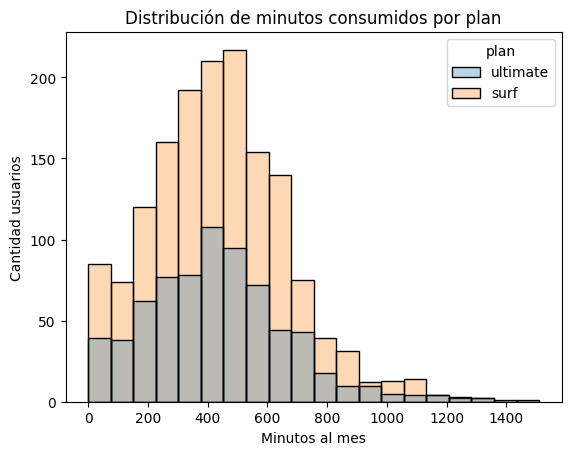

In [43]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

sns.histplot(data=t_complete_by_user, x='num_mins', hue='plan', kde=False, bins=20, alpha=0.3)

plt.title('Distribución de minutos consumidos por plan')
plt.xlabel('Minutos al mes')
plt.ylabel('Cantidad usuarios')

Conclusión: Los usuarios del plan Surf tienden a consumir mas minutos al mes que los del plan Ultimate, por eso muy seguramente generaran mas cobros extras.

## Calcularemos la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [44]:
# Calcula la media de la duración mensual de llamadas.

mean_call_time_by_plan = (t_complete_by_user.groupby('plan')['avg_call_time'].mean())
mean_call_time_by_plan

plan
surf        7.158130
ultimate    7.078557
Name: avg_call_time, dtype: float64

In [45]:
# Calcula la varianza de la duración mensual de llamadas.

varianza=np.var(t_complete_by_user['avg_call_time'])
print(varianza)

1.1294075578303922


In [46]:
t_complete_by_user.groupby('plan')['avg_call_time'].var()

plan
surf        1.227523
ultimate    0.915475
Name: avg_call_time, dtype: float64

Conclusion: El plan Surf, tiene mas variacion en la duración promedio de las llamadas entre usuarios y meses, el plan Ultimate, la duración es más consistente, más estable, es decir que los usuarios de Surf hacen llamadas más impredecibles (algunas muy largas, otras más cortas), los usuarios de Ultimate tienden a tener llamadas de duración más similar entre sí, y la duración media es ligeramente mas alta en el plan Surf.

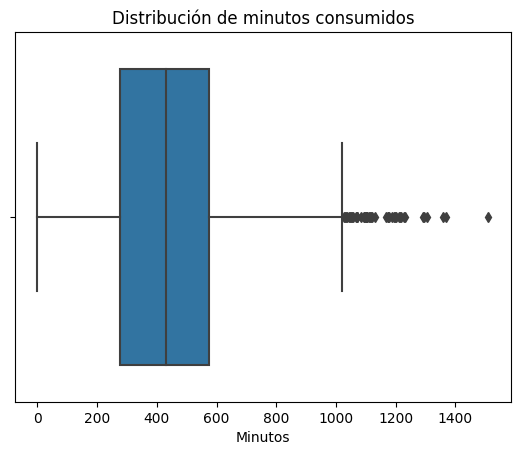

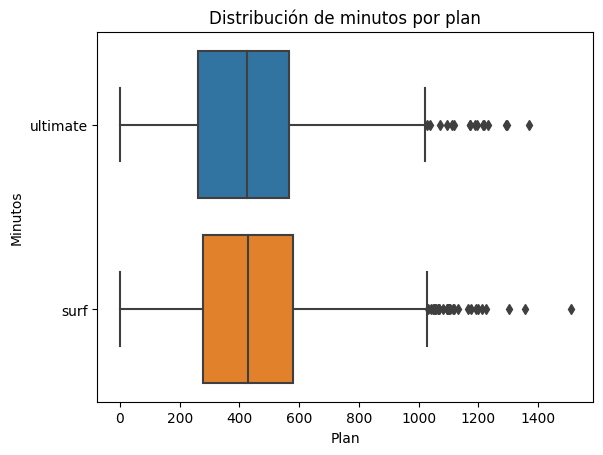

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=t_complete_by_user,x='num_mins')
plt.title('Distribución de minutos consumidos')
plt.xlabel('Minutos')
plt.show()

sns.boxplot(data=t_complete_by_user, y='plan', x='num_mins')
plt.title('Distribución de minutos por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()

Conclusión: Hay clientes que tienen consumos mayores, entre mil y mil cuatrocientos minutos; pero realmente su comportamiento no varia mucho respecto de los 2 planes, es bastante similar.

### Mensajes

Text(0, 0.5, 'Cantidad usuarios')

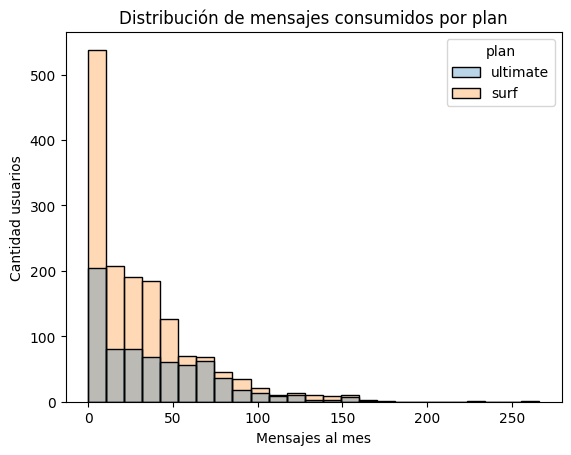

In [48]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

sns.histplot(data=t_complete_by_user, x='num_messages', hue='plan', kde=False, bins=25, alpha=0.3)

plt.title('Distribución de mensajes consumidos por plan')
plt.xlabel('Mensajes al mes')
plt.ylabel('Cantidad usuarios')

Conclusión: Los usuarios del plan Surf tienden a enviar mas mensajes al mes que los del plan Ultimate, por eso muy seguramente generaran mas cobros extras. Tambien que el pico de cantidad de mensajes mas enviados por la mayoria de los usuarios es de 0 a 10. De igual forma se observa que los usuarios del plan Ultimate no hace mucho uso de toda la disponibilidad de mensajes que tiene.

## Calcularemos la media y la varianza de la cantidad de mensajes enviados para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus envios.

In [49]:
# Calcula la media de la cantidad mensual de mensajes.

mean_messages_by_plan = (t_complete_by_user.groupby('plan')['num_messages'].mean())
mean_messages_by_plan

plan
surf        30.897735
ultimate    37.725105
Name: num_messages, dtype: float64

In [50]:
# Calcula la varianza de la cantidad mensual de mensajes.

t_complete_by_user.groupby('plan')['num_messages'].var()

plan
surf        1131.949380
ultimate    1210.143428
Name: num_messages, dtype: float64

Conclusion: El plan Surf, tiene ligeramente una variacion mas baja comparada con Ultimate, sin embargo ambos tienen una alta varianza lo que indica que el numero de mensajes enviados por mes varia bastante entre los usuarios; respecto a la cantidad promedio de mensajes enviados mensualmente el plan ultimate es un poco mas alto.

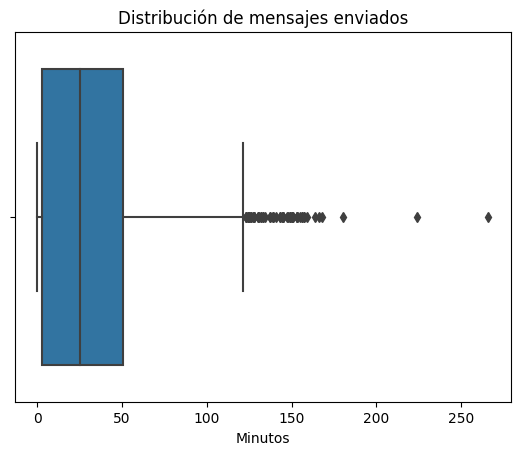

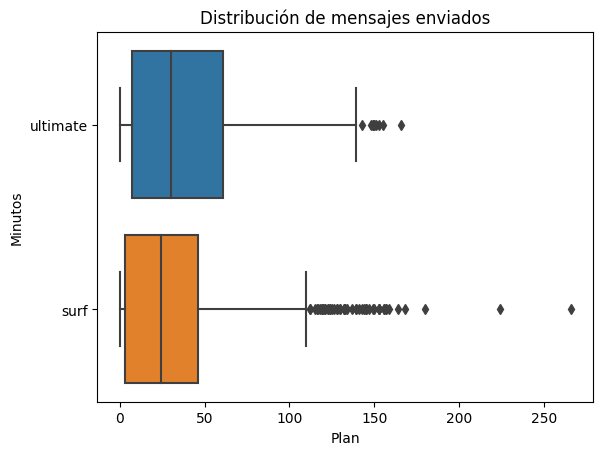

In [51]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=t_complete_by_user,x='num_messages')
plt.title('Distribución de mensajes enviados')
plt.xlabel('Minutos')
plt.show()

sns.boxplot(data=t_complete_by_user, y='plan', x='num_messages')
plt.title('Distribución de mensajes enviados')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()

Conclusión: Hay clientes que tienen consumos mayores, entre 140-180 (ultimate) y entre 110-270 (surf) mas concentrado en 110-170; su comportamiento varia considerablemente respecto de los 2 planes, son diferentes.

### Internet

Text(0, 0.5, 'Cantidad usuarios')

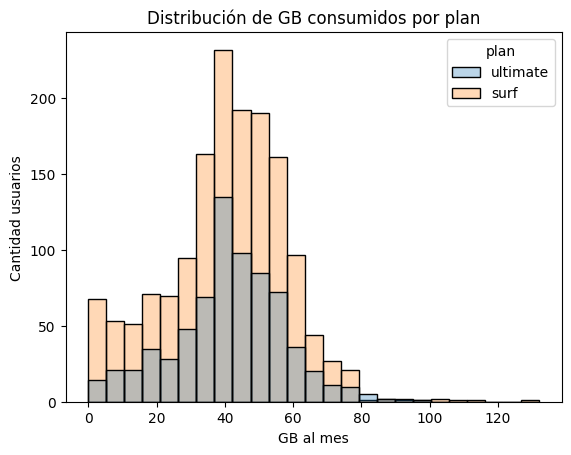

In [52]:
# Comprara el número de uso de GB en cada mes de los usuarios de cada plan

sns.histplot(data=t_complete_by_user, x='num_gb', hue='plan', kde=False, bins=25, alpha=0.3)

plt.title('Distribución de GB consumidos por plan')
plt.xlabel('GB al mes')
plt.ylabel('Cantidad usuarios')

Conclusión: Los usuarios del plan Surf tienden a consumir mas GB de Internet al mes que los del plan Ultimate, por eso muy seguramente generaran mas cobros extras. Los picos estan en 40 GB, es decir que los usuarios del plan Ultimate (30 GB) estan generalmente usando 10 GB de mas, pero el caso mas especial estan en el Plan Surf (15GB) donde la gran mayoria de usuarios esta excediento 25 GB en promedio.

## Calcularemos la media y la varianza del consumo de Internet (GB) para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [53]:
# Calcula la media del consumo mensual de Internet.

mean_internet_by_plan = (t_complete_by_user.groupby('plan')['num_gb'].mean())
mean_internet_by_plan

plan
surf        40.166990
ultimate    41.267882
Name: num_gb, dtype: float64

In [54]:
# Calcula la varianza del consumo mensual de Internet.

t_complete_by_user.groupby('plan')['num_gb'].var()

plan
surf        311.244117
ultimate    265.494150
Name: num_gb, dtype: float64

Conclusion: El plan Surf, tiene mas variacion en el consumo promedio internet entre usuarios y meses, sin embargo el plan Ultimate, tambien tiene una varianza alta, aunque inferior al de Surf, y el consumo medio es ligeramente igual en ambos planes, pero ambos superando el limite de cada plan/tarifa.

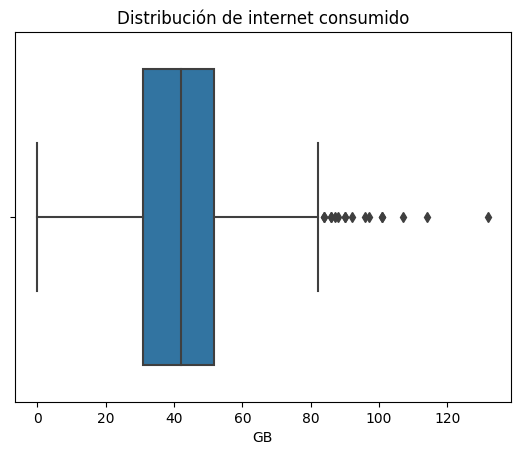

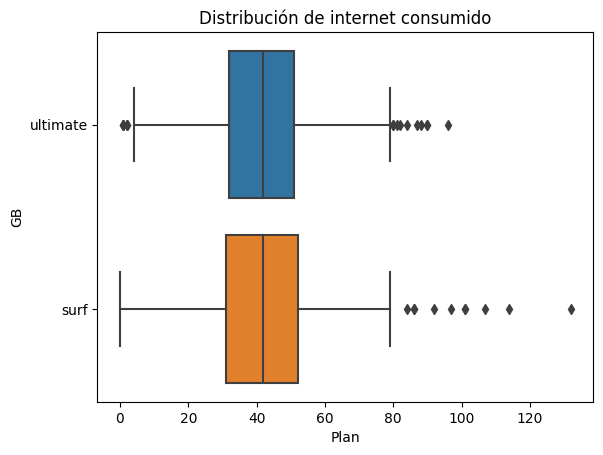

In [55]:
# Traza un diagrama de caja para visualizar la distribución del consumo mensual de Inernet

sns.boxplot(data=t_complete_by_user,x='num_gb')
plt.title('Distribución de internet consumido')
plt.xlabel('GB')
plt.show()

sns.boxplot(data=t_complete_by_user, y='plan', x='num_gb')
plt.title('Distribución de internet consumido')
plt.xlabel('Plan')
plt.ylabel('GB')
plt.show()

Conclusión: Hay clientes que tienen consumos mayores y atipicos, entre 80 y 100 (Plan Ultimate) y, 90 y 140 (Plan Surf) aunque mas sesgado; pero realmente su comportamiento no varia mucho respecto de los 2 planes, es bastante similar.

## Ingreso

Text(0, 0.5, 'Cantidad usuarios')

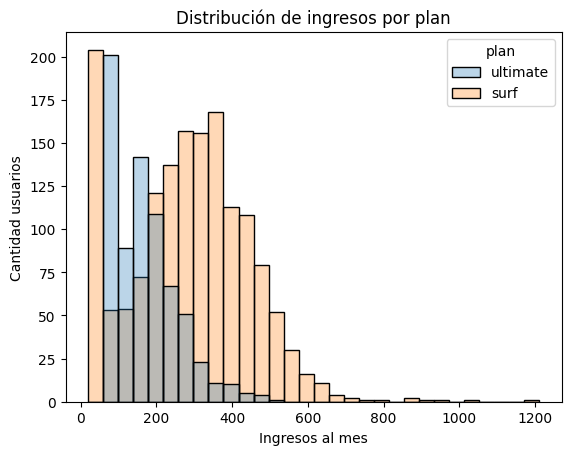

In [56]:
# Comprara el total de ingresos generados cada mes, de los usuarios de cada plan

sns.histplot(data=t_complete_by_user, x='revenue', hue='plan', kde=False, bins=30, alpha=0.3)

plt.title('Distribución de ingresos por plan')
plt.xlabel('Ingresos al mes')
plt.ylabel('Cantidad usuarios')

Conclusión: Se observa que el plan Surf tienden a generar mas ingresos que Ultimate, aproximadamente corresponden a un 70%-30% del total de los ingresos respectivamente. 
En Surf podemos ver un comportamiento mas inestable y disperso con una cola larg a la derecha por ingresos elevados (muy posiblemente causados por los valores extras generados adicionales a su tarifa original), y en Ultimate un comportamiento mas compacto con mayor concentracion.

### Calcularemos la media y la varianza de los ingresos mensuales para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [57]:
# Calcula la media de los ingresos.

mean_revenue_by_plan = (t_complete_by_user.groupby('plan')['revenue'].mean())
mean_revenue_by_plan

plan
surf        282.364997
ultimate    167.018233
Name: revenue, dtype: float64

In [58]:
# Calcula la varianza de los ingresos.

t_complete_by_user.groupby('plan')['revenue'].var()

plan
surf        25960.869119
ultimate     7551.779161
Name: revenue, dtype: float64

Conclusion: El plan Surf, tiene mas sesgo en la distribucion de sus ingresos, el plan Ultimate aunque tambien tiene un valor alto de varianza es un poco mas estable, es decir que los usuarios de Surf en muchos de los casos no siguen las condiciones del plan e incurren en muchos sobrecostos, mienstras que ultimate tiende a ceñirse mas a las condiciones originales, y la media de los ingresos promedio mensuales es mas alta en el plan Surf.

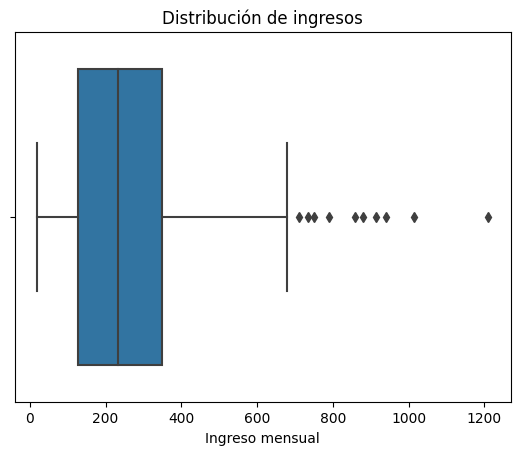

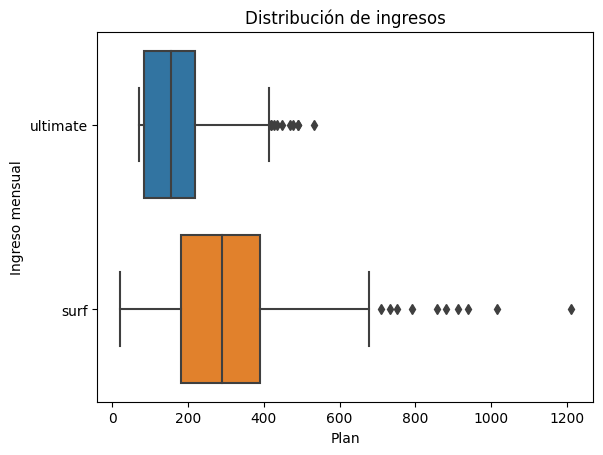

In [59]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos mensuales.

sns.boxplot(data=t_complete_by_user,x='revenue')
plt.title('Distribución de ingresos')
plt.xlabel('Ingreso mensual')
plt.show()

sns.boxplot(data=t_complete_by_user, y='plan', x='revenue')
plt.title('Distribución de ingresos')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual')
plt.show()

Conclusión: El comportamiento de los ingresos en cada uno de los planes es bastante diferente, Surf esta en un rango mas a la derecha lo que implica mayor generacion de ingresos, sus limites tambien son mas grandes.
En ambos se observan valores atipicos, aunque en ultimate son mas compilados no hay tanta varanza y no estan tan dispersos hacia valores muy altos, lo que indica mayor estabilidad, por otro laso Surf tiene muchos valores atipicos, muy dispersos entre si y desplazados muy a la derecha hacia ingresos bastante altos, lo cual indica ingresos mas inestables.

## Prueba las hipótesis estadísticas

### En esta ocasión vamos a probar la hipótesis de que el ingreso promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

Elaboramos las hipótesis nula y alternativa, y determinamos el valor alfa.

Hipótesis:

- H0: El ingreso promedio entre los planes Surf y Ultimate es el mismo.
- H1: El ingreso promedio entre los planes Surf y Ultimate es diferente

Nivel de significancia (α): 0.05

In [60]:
# Prueba las hipótesis

surf=t_complete_by_user[t_complete_by_user['plan']=='surf']['revenue'].to_list()
ultimate=t_complete_by_user[t_complete_by_user['plan']=='ultimate']['revenue'].to_list()

Escogemos y desarrollamos la prueba estadistica.

In [61]:
result=st.ttest_ind(surf,ultimate,equal_var=False)
print('Valor p:', result.pvalue)

Valor p: 1.9466628545140712e-97


In [62]:
alpha = 0.05
if (result.pvalue < alpha):
    print('Rechaza hipotesis nula: Los ingresos promedio de los 2 planes son diferentes.')
else:
    print('No podemos rechazar la hipotesis nula: No hay diferencia significativa.')


Rechaza hipotesis nula: Los ingresos promedio de los 2 planes son diferentes.


### En esta ocasión vamos a probar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Primero vamos a acondicionar nuestro DF de manera que se adicione la columna de city traida desde el DF de users, y posteriormente vamos a crear una nueva columna llamada region_group para separar y catalogar las usuarios que pertenecen al area de NY-NJ, y los demas (Otros) para poder dar solucion a la hipotesis.

In [63]:
t_complete_by_user = t_complete_by_user.merge(users[['user_id', 'city']], on='user_id', how='left')
t_complete_by_user['region_group'] = np.where(t_complete_by_user['city'].str.contains('NY-NJ'), 'NY-NJ', 'Other')

Elaboramos las hipótesis nula y alternativa, y determinamos el valor alfa.

Hipótesis:

- H0: El ingreso promedio entre los usuarios del area NY-NJ y los usuarios de otras regiones son el mismo.
- H1: El ingreso promedio entre los usuarios del area NY-NJ y los usuarios de otras regiones son diferentes.

Nivel de significancia (α): 0.05

Escogemos y desarrollamos la prueba estadistica.

In [64]:
# Prueba las hipótesis

ny_nj=t_complete_by_user[t_complete_by_user['region_group']=='NY-NJ']['revenue'].to_list()
other=t_complete_by_user[t_complete_by_user['region_group']=='Other']['revenue'].to_list()

In [65]:
result=st.ttest_ind(ny_nj,other,equal_var=False)
print('Valor p:', result.pvalue)

Valor p: 0.00876594195209473


In [66]:
alpha = 0.05
if (result.pvalue < alpha):
    print('Rechaza hipotesis nula: Los ingresos promedio de las 2 areas son diferentes.')
else:
    print('No podemos rechazar la hipotesis nula: No hay diferencia significativa.')

Rechaza hipotesis nula: Los ingresos promedio de las 2 areas son diferentes.


## Conclusión general
Luego de haber realizado los diferentes analisis para cada una de las variables, conceptos y conjuntos de informacion, se observan algunas similitudes entre los 2 planes, y muchas otras diferencias entre si:

1. Los usuarios de Ultimate generar menos ingresos, pero son mas homogeneos, tienen poca variabilidad lo que permite hacerlos mas predecibles.
2. El plan ultimate permite mas estabilidad financiera, pero limita un crecimiento exponencial.
3. Ultimate cumple a los usuarios las conidiciones de su plan, donde se paga un valor fijo sin tener que incurrir en valores extras.
4. Los usuarios de Surf generan mas ingresos, pero son mas dispersos, tienen mucho sesgo lo que los hace muy dificiles de predecir.
5. El plan Surf permitiria un potencial de rentabilidad alta, pero directamente proporcional su nivel de riesgo.
6. Surf hace que los usuarios muchas veces tengan que incurrir en costos extras, valores adicionales por su uso.

Por todo lo anterior, y las diferentes conclusiones realizadas en el transcurso del analisis del proyecto, puedo decir que para determinar el presupuesto de publicidad para alguno de los planes, se debe considerar que estrategia tiene el departamento comercial, el area financiera  y la alta gerencia de acuerdo a lo siguiente:

SURF: 70% ingresos - impredecible por variabilidad - apostar por alta rentabilidad pero riesgosa.

ULTIMATE: 30% ingresos - facil de predecir por la consistencia - apostar por estabilidad financiera.